In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import kaggle

# M1 T02: Data exploration and structure - Dataframes with Pandas
Description

Familiarize yourself with data exploration techniques using the data structure, Dataframe with the Pandas library.
Level 1

# Exercises 1

Download the Airlines Delay: Airline on-time statistics and delay causes data set and upload it to a Dataframe pandas. Explore the data it contains, and keep only the columns you consider relevant.


In [10]:
# Prepare directories
root = os.getcwd()
print("Project path: ", root)

# Change working directory
new_wd = "kaggle-airline-df"
data_dir = os.path.join(root, new_wd)
if not os.path.isdir(data_dir):
    os.mkdir(data_dir)
# move into data_dir to download the data
os.chdir(data_dir)
# Tip: if a "strange" dir path is load, restar the kernel

Project path:  /home/su/workspace/python/ciencia_dades_python/CDP_all_lessons_code


In [11]:
# Download the dataset using Kaggle's API
!kaggle datasets download giovamata/airlinedelaycauses
!unzip airlinedelaycauses.zip
!rm airlinedelaycauses.zip

100%|██████████████████████████████████████| 66.6M/66.6M [00:06<00:00, 11.3MB/s]
100%|██████████████████████████████████████| 66.6M/66.6M [00:06<00:00, 11.3MB/s]
Archive:  airlinedelaycauses.zip
  inflating: DelayedFlights.csv      
  inflating: st99_d00.dbf            
  inflating: st99_d00.shp            
  inflating: st99_d00.shx            


In [12]:
# going back to main folder
print('Actual data folder: ', os.getcwd())
os.chdir(root)
print('Actual code folder: ', os.getcwd())

Actual data folder:  /home/su/workspace/python/ciencia_dades_python/CDP_all_lessons_code/kaggle-airline-df


'/home/su/workspace/python/ciencia_dades_python/CDP_all_lessons_code'

In [14]:
# As this is a dataset centered around flight delays, the main purpose is to
# analyze the timings related to routes, companies, airports, etc.
# By reading the column names, we can understand if there are some that 
# will not be of interest, which will be removed

# Load only the column names from the CSV file
file_name = "kaggle-airline-df/DelayedFlights.csv"
col_names = pd.read_csv(file_name, nrows=1).columns.tolist()
print(col_names)

['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


### Field explanation

Now that the column names are available, we can dive into each column meaning.

- YEAR: Year in which each of the study samples was collected. In this case, all the samples coincide in the year 2008, however, for studies of greater magnitude and greater temporal amplitude, it is necessary to limit the temporal variable of the data.

- MONTH: Month in which each of the study samples were collected. This parameter varies on a scale from 1 to 12, with 1 being the month of January and 12 being the month of December. As in the previous case, all the samples coincide in the month of January, however, for studies of greater magnitude and greater temporal amplitude, it is necessary to limit the temporal variable of the data.

- DAY_OF_MONTH: Day of the month on which each study sample was collected. This parameter varies on a scale from 1 to 31, coinciding with the numbering of the monthly day of the data.

- DAY_OF_WEEK: Day of the week on which each study sample was collected. This parameter varies on a scale from 1 to 7, with 1 being the number equivalent to Monday and 7 being the equivalent to Sunday. Both this data and the previous one may be necessary to estimate which day of the week (eg the beginning of the weekend) or which day of the month (eg the beginning of the month) it is estimated that there may be more congestion and hence more flight delays.

- DEP_TIME: Departure time. Flight departure time in real local time (LMT) expressed as a set of four digits, the first two being the hour and the last two being the minutes. Time computed at the moment in which the aircraft leaves the door or gate. Essential data to calculate and forecast collapses based on the time of day, peak hours and work peaks.

- CRS_DEP_TIME: Computerized Reservations Systems (CRS) departure time. Time that each airline has computed as departure time. It can be defined as the departure time that the company estimates at which each flight will depart. Very useful data to check the difference between the actual departure time and the time estimated by the company. Indicator of the "on-time performance" of each airline.

- ARR_TIME: Arrival time. Arrival time of the flight in real local time (LMT) expressed as a set of four digits, the first two being the hour and the last two being the minutes. Time computed at the moment the aircraft's nosewheel hits the Tarmac. Essential data to calculate and forecast collapses based on the time of day, peak hours and work peaks.

- CRS_ARR_TIME: Computerized Reservations Systems (CRS) arrival time. Time that each airline has computed as arrival time. It can be defined as the departure time that the company estimates at which each flight will arrive. Very useful data to check the difference between the real time of arrival and the time estimated by the company. Indicator of the "on-time performance" of each airline.

- UNIQUE_CARRIER: Name in initials of the airline from which the data sample is collected. Necessary data to associate each delay with each airline and be able to estimate and predict which companies produce more delays. Character string.

- FL_NUM: FlightNumber. Flight number of each sample.

- TAIL_NUM: TailNumber. Set of numbers and letters that make up the registration record of each aircraft, located in the tail of the plane. This number is unique for each aircraft and its format depends on the country of registration (eg in the case of the USA it is made up of the letter November plus a set of digits). It can be found both in the front and rear of the plane and under the planes.

- ACTUAL_ELAPSED_TIME: Actual flight time, from origin departure to destination arrival, expressed in minutes as a set of integers. Useful data for the estimation and identification of behaviors or delays en route.

- CRS_ELAPSED_TIME: Computerized Reservations Systems (CRS) elapsed time. Time that each airline has computed in its system as flight time, from departure at origin to arrival at destination, expressed in minutes as a set of integers. Useful data for the estimation and identification of behaviors or delays en route and the difference with the real time of flight for the calculation of the on-time performance.

- AIR_TIME: Real flight time in air, from departure at origin to arrival at destination, counted from when the plane leaves the runway until it comes into contact with it again, expressed in minutes as an integer. Useful data for the estimation and identification of behaviors or delays en route.

- ARR_DELAY: Difference between the arrival time of CRS or estimated by the company and the actual arrival time at destination, expressed in minutes as an integer. Useful information to identify the source of a problem or delay.

- DEP_DELAY: Difference between the departure time of CRS or estimated by the company and the actual departure time at origin, expressed in minutes as a number e

- CRS_ELAPSED_TIME: Computerized Reservations Systems (CRS) elapsed time. Time that each airline has computed in its system as flight time, from departure at origin to arrival at destination, expressed in minutes as a set of integers. Useful data for the estimation and identification of behaviors or delays en route and the difference with the real time of flight for the calculation of the on-time performance.

- AIR_TIME: Real flight time in air, from departure at origin to arrival at destination, counted from when the plane leaves the runway until it comes into contact with it again, expressed in minutes as an integer. Useful data for the estimation and identification of behaviors or delays en route.

- ARR_DELAY: Difference between the arrival time of CRS or estimated by the company and the actual arrival time at destination, expressed in minutes as an integer. Useful information to identify the source of a problem or delay.

- DEP_DELAY: Difference between the CRS departure time or estimated by the company and the actual departure time at origin, expressed in minutes as an integer. Useful information to identify the source of a problem or delay.

- ORIGIN: Flight origin airport code, expressed as a string of three-letter characters. Unique code for each airport standardized by the International Air Transport Association (IATA).

- DEST: Flight destination airport code, expressed as a string of three-letter characters. Unique code for each airport standardized by the International Air Transport Association (IATA).

- DISTANCE: Distance between the origin and destination airports, expressed in nautical miles as an integer. Useful data to estimate the relationship between the delays and the flight distance between several jumps.

- TAXI_IN: Taxi in time. Rolling time to gate at the destination airport. Expressed as a set of integers in minutes. Useful data to identify delays in rolling phases and operations.

- TAXI_OUT: Taxi out time. Taxi time from the gate to the runway at the airport of origin. Expressed as a set of integers in minutes. Useful data to identify delays in rolling phases and operations.

- CANCELED: Identifier of canceled flight. Expressed as a binary value, being zero if the flight has taken place or one if it has been cancelled. When this value is one, all other temporary values ​​are ignored.

- CANCELLATION_CODE: Cancellation code. Expressed with an alphabetical character depending on the cause of cancellation following the following - legend: A-"Carrier", B-"Weather", C-"National Air System", D-"Security".

- FUN: Diverted flight indicator. Expressed as a binary value, being zero if the flight has been carried out normally or one if it has been diverted.

- CARRIER_DELAY: Delay caused by the carrier. Expressed as a set of integers in minutes. Useful data to identify delays caused by this factor.

- WEATHER_DELAY: Delay caused by inclement weather. Expressed as a set of integers in minutes. Useful data to identify delays caused by this factor.

- NAS_DELAY: Delay caused by the National Air System. Expressed as a set of integers in minutes. Useful data to identify delays caused by this factor.

- SECURITY_DELAY: Delay caused by security controls or their inspections. Expressed as a set of integers in minutes. Useful data to identify delays caused by this factor.

- LATE_AIRCRAFT_DELAY: Delay due to late arrival of the aircraft. Expressed as a set of integers in minutes. Useful data to identify delays caused by this factor.

Having a look to previous description and to the notes of exercise 2, it seems expecially importante 'Cancelled' and also 'UniqueCarrier', 'Year', 'Month', 'DayofMonth', 'Distance', 'AirTime', 'DepTime', 'CRSDepTime', 'ArrDelay', 'DepDelay'.

# Exercises 2

Make a complete report of the date set:
  - Summarize the columns of interest statistically
  - Find how many missing data are per column
  - Create new columns (average flight speed, whether late or not ...)
  - Table of airlines with the most accumulated arrears
  - What are the longest flights? And the most backward?
  - Etc.


In [16]:
df = pd.read_csv(
    file_name,
    usecols = [
        'Cancelled', 'UniqueCarrier', 'Year', 'Month', 'DayofMonth',
        'Distance', 'AirTime', 'DepTime', 'CRSDepTime', 'ArrDelay', 'DepDelay'])
print(df)

         Year  Month  DayofMonth  DepTime  CRSDepTime UniqueCarrier  AirTime  \
0        2008      1           3   2003.0        1955            WN    116.0   
1        2008      1           3    754.0         735            WN    113.0   
2        2008      1           3    628.0         620            WN     76.0   
3        2008      1           3   1829.0        1755            WN     77.0   
4        2008      1           3   1940.0        1915            WN     87.0   
...       ...    ...         ...      ...         ...           ...      ...   
1936753  2008     12          13   1250.0        1220            DL    120.0   
1936754  2008     12          13    657.0         600            DL     78.0   
1936755  2008     12          13   1007.0         847            DL    122.0   
1936756  2008     12          13   1251.0        1240            DL     89.0   
1936757  2008     12          13   1110.0        1103            DL    104.0   

         ArrDelay  DepDelay  Distance  

## data exploration and preparation

In [21]:
# inspect the type of data
df.dtypes

Year               int64
Month              int64
DayofMonth         int64
DepTime          float64
CRSDepTime         int64
UniqueCarrier     object
AirTime          float64
ArrDelay         float64
DepDelay         float64
Distance           int64
Cancelled          int64
dtype: object

In [24]:
# use category type for UniqueCarrier
df['UniqueCarrier'] = df['UniqueCarrier'].astype('category')

In [25]:
df.dtypes

Year                int64
Month               int64
DayofMonth          int64
DepTime           float64
CRSDepTime          int64
UniqueCarrier    category
AirTime           float64
ArrDelay          float64
DepDelay          float64
Distance            int64
Cancelled           int64
dtype: object

As an additional mesure, we could reduce Year, Month, DayOfMonth fields to int16, or (even better) add a column of type datetime, join those fields.

In [17]:
# Find how many missing data are per column
df.isna().sum().sum()

16774

In [18]:
# filter not cancelled, cause it can induce a distortion in the speed
df = df[df['Cancelled'] == 0 ]
print(df)

         Year  Month  DayofMonth  DepTime  CRSDepTime UniqueCarrier  AirTime  \
0        2008      1           3   2003.0        1955            WN    116.0   
1        2008      1           3    754.0         735            WN    113.0   
2        2008      1           3    628.0         620            WN     76.0   
3        2008      1           3   1829.0        1755            WN     77.0   
4        2008      1           3   1940.0        1915            WN     87.0   
...       ...    ...         ...      ...         ...           ...      ...   
1936753  2008     12          13   1250.0        1220            DL    120.0   
1936754  2008     12          13    657.0         600            DL     78.0   
1936755  2008     12          13   1007.0         847            DL    122.0   
1936756  2008     12          13   1251.0        1240            DL     89.0   
1936757  2008     12          13   1110.0        1103            DL    104.0   

         ArrDelay  DepDelay  Distance  

In [19]:
# statistic
df.describe()

,Year,Month,DayofMonth,DepTime,CRSDepTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled
count,1936125.0,1.936125e+06,1.936125e+06,1.936125e+06,1.936125e+06,1.928371e+06,1.928371e+06,1.936125e+06,1.936125e+06,1936125.0
mean,2008.0,6.109290e+00,1.575273e+01,1.518516e+03,1.467472e+03,1.082771e+02,4.219988e+01,4.316920e+01,7.657387e+02,0.0
std,0.0,3.481648e+00,8.776544e+00,4.504648e+02,4.247594e+02,6.864261e+01,5.678472e+01,5.337556e+01,5.744840e+02,0.0
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.0
25%,2008.0,3.000000e+00,8.000000e+00,1.203000e+03,1.135000e+03,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,0.0
50%,2008.0,6.000000e+00,1.600000e+01,1.545000e+03,1.510000e+03,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,0.0
75%,2008.0,9.000000e+00,2.300000e+01,1.900000e+03,1.815000e+03,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,0.0
max,2008.0,1.200000e+01,3.100000e+01,2.400000e+03,2.359000e+03,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,0.0


In [31]:
# it looks like that wrong values are present in the df, that can affect the speed column

In [30]:
df['Speed'] = df['Distance']/df['AirTime'] 
df.describe()

,Year,Month,DayofMonth,DepTime,CRSDepTime,AirTime,ArrDelay,DepDelay,Distance,Cancelled,Speed
count,1936125.0,1.936125e+06,1.936125e+06,1.936125e+06,1.936125e+06,1.928371e+06,1.928371e+06,1.936125e+06,1.936125e+06,1936125.0,1.928371e+06
mean,2008.0,6.109290e+00,1.575273e+01,1.518516e+03,1.467472e+03,1.082771e+02,4.219988e+01,4.316920e+01,7.657387e+02,0.0,inf
std,0.0,3.481648e+00,8.776544e+00,4.504648e+02,4.247594e+02,6.864261e+01,5.678472e+01,5.337556e+01,5.744840e+02,0.0,NaN
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.0,3.548387e-01
25%,2008.0,3.000000e+00,8.000000e+00,1.203000e+03,1.135000e+03,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,0.0,5.864407e+00
50%,2008.0,6.000000e+00,1.600000e+01,1.545000e+03,1.510000e+03,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,0.0,6.730337e+00
75%,2008.0,9.000000e+00,2.300000e+01,1.900000e+03,1.815000e+03,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,0.0,7.469136e+00
max,2008.0,1.200000e+01,3.100000e+01,2.400000e+03,2.359000e+03,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,0.0,inf


infinte value for speed means data needs finement

In [32]:
# So, narrowing down the implied fields: check if values are meaningful 
df[['Distance', 'AirTime', 'Speed']].describe()   # tip: notice double [

,Distance,AirTime,Speed
count,1.936125e+06,1.928371e+06,1.928371e+06
mean,7.657387e+02,1.082771e+02,inf
std,5.744840e+02,6.864261e+01,NaN
min,1.100000e+01,0.000000e+00,3.548387e-01
25%,3.380000e+02,5.800000e+01,5.864407e+00
50%,6.060000e+02,9.000000e+01,6.730337e+00
75%,9.980000e+02,1.370000e+02,7.469136e+00
max,4.962000e+03,1.091000e+03,inf


ValueError: supplied range of [0.3548387096774194, inf] is not finite

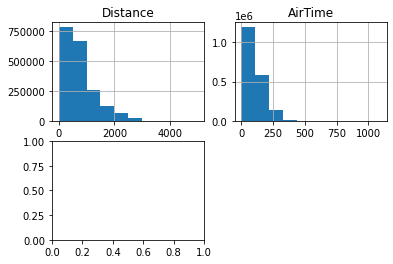

In [33]:
# infinite values force me to filter the 
# visual inspect
df[['Distance', 'AirTime', 'Speed']].hist()

# remove inf lines or accept the error

In [ ]:
# avoid 0 flight values
df = df[df['AirTime'] > 0]


In [ ]:
df['Speed'] = df['Distance']/df['AirTime'] 

In [ ]:
df[['Distance', 'AirTime', 'Speed']].hist()

In [ ]:
df['Speed'].describe()

In [ ]:
df[['Distance', 'AirTime', 'Speed']].sort_values(by='Speed').head()

In [ ]:
df[['Distance', 'AirTime', 'Speed']].sort_values(by='Speed').tail()

In [ ]:
# TODO
# ?? add SI units in the columns (parameters)
# comment the cells

In [ ]:
'''   - Create new columns (average flight speed, whether late or not ...)
  - Table of airlines with the most accumulated arrears
  - What are the longest flights? And the most backward?
  - Etc. '''

In [ ]:
# late or not 
# Create new columns (average flight speed, whether late or not ...)

In [ ]:

# Table of airlines with the most accumulated delay

# group by sum / count_number_of_flights 


In [ ]:
# What are the longest flights? And the most backward?
  

In [ ]:
def get_report(df: pd.DataFrame) -> dict:
    ''' Find how many missing data are per column '''
    results = {} 
    results['stats'] = calc_stats(df)  
    speed = calc_speed(df)
    results['speed_min'] = speed['speed_min']
    results['speed_max'] = speed['speed_max']
    results['faster'] = calc_faster_than_expected(df)
    return results

def calc_stats(df) -> dict:
    ''' Summarize the columns of interest statistically'''
    stats = {}
    stats['total_rows'] = df.shape[0]
    stats['missing_values'] = df.isnull().sum().sum()
    # print(df.isnull().sum())
    # print(stats['missing_values'])
    return stats

def calc_speed(df: pd.DataFrame) -> dict:
    ''' Create new columns average flight speed'''
    df['speed'] = df['Distance']/df['AirTime'] 
    # df.apply(lambda row: row['Distance']/row['AirTime']),
    #                      axis = 1)
    # print(df['speed'])
    res = {
        'speed_min': df['speed'].loc[df['speed'].idxmin()], 
        'speed_max': df['speed'].loc[df['speed'].idxmax()], 
        # 'speed_avg': df['speed'].loc[df['speed']. 
    }
    # print(speed_min)
    print(res)
    return res
    
def calc_late_or_early(df: pd.DataFrame) -> pd.DataFrame:
    ''' Create new columns whether late or early '''
    pass

def calc_faster_than_expected(df: pd.DataFrame) -> None:
    ''' difference between 'ArrDelay', 'DepDelay'])'''''
    df['faster'] = df['DepDelay'] - df['ArrDelay']
    return None


def test_get_report(df):
    # assert get_report(df) == 123
    assert get_report(df)['speed_min'] == 0.3548387096774194
    # assert get_report(df)['speed_max'] == 'inf'
    assert get_report(df)['stats']['missing_values'] == 4
test_get_report(df)

print(df)


In [ ]:
def table(df):
    ''' - Table of airlines with the most accumulated arrears'''
    grouped = df.groupby('UniqueCarrier')
    print(grouped['ArrDelay'].agg([np.max, np.mean, np.std]))


table(df)

### Exercises 3

Export the data set clean and with the new columns to Excel.


Create a function that given a two-dimensional table, calculates the totals per row and the totals per column.

In [ ]:
def export_to_excel(df: pd.DataFrame) -> None:
    ''' export dataframe to xlsx, no index '''

    if df.shape[0] < 1048576:
        # This is a limitation of Excel, where sheets can have a maximum of 1048576 rows. 
        name = datetime.datetime.now().strftime('%y-%m-%d_%H_%M_%S') + '.xlsx'
        df.to_excel(name, index=False) 
    else: 
        name = datetime.datetime.now().strftime('%y-%m-%d_%H_%M_%S') + '.csv'
        df.to_csv(name, index=False) 
    
export_to_excel(df)